# pyICON.view for R2B9 atmospheric data

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np

## Specify data set

Define a dataset with giving the path to the data and information about the triangular grid and the regular grid. The regular grid needs to be created in advance (use pyic.calc_ckdtree for that).

In [3]:
run = 'dpp0016'
runname = ''
gname = 'r2b9a'
lev = ''

path_data     = f'/work/mh0287/k203123/GIT/icon-aes-dyw_albW/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'

In [14]:
IcD = pyic.IconData(
#                fname        = run+'_atm_3d_w_ml_????????????????.nc',
#                fname        = run+'_atm_3d_2_ml_????????????????.nc',
    fname        = run+'_atm3_2d_ml_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    model_type   = 'atm',
    do_triangulation = True,
    omit_last_file   = True,
    calc_coeff       = False,
    load_triangular_grid = True,
    verbose          = True,
                   )
# Fake depth data
IcD.depthc=np.arange(77)

-v-: set paths and fnames
-v-: set global variables
-v-: find  ckdtrees etc.
::: Warning: Could not find any section-npz-file in /mnt/lustre01/work/mh0033/m300602/icon/grids/r2b9a/ckdtree/sections/. :::
::: Warning: no section found.:::
-v-: load tgrid
-v-: load rgrid
-v-: load vgrid
-v-: do_triangulation
-v-: list of variables and time steps


## Plotting on a regular grid

<IPython.core.display.Javascript object>


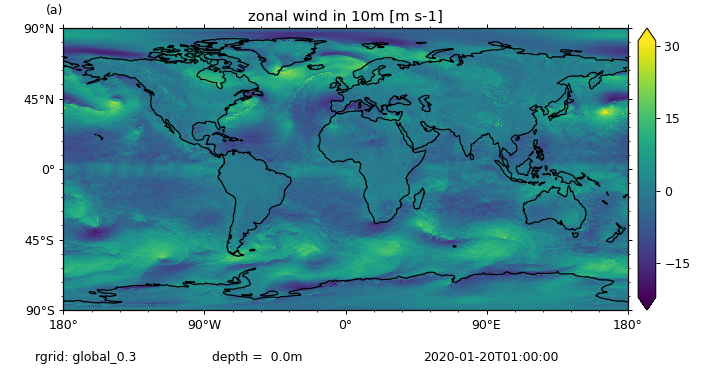

Output()

In [17]:
PyicV = pyic.view.hplot(IcD, use_tgrid=False, logplot=False, verbose=False)

<IPython.core.display.Javascript object>


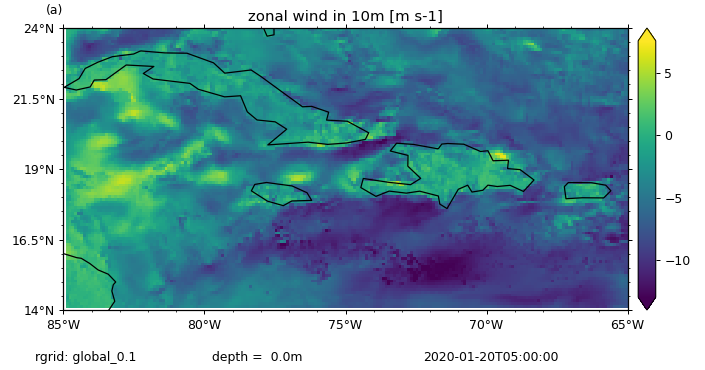

Output()

In [16]:
lon_reg = [-85,-65]
lat_reg = [14,24]
PyicV = pyic.view.hplot(IcD, use_tgrid=False, logplot=False, verbose=False, 
                        lon_reg=lon_reg, lat_reg=lat_reg, rgrid_name='global_0.1')

## Plotting on the original grid

Select a small region. Otherwise it takes too long.

<IPython.core.display.Javascript object>


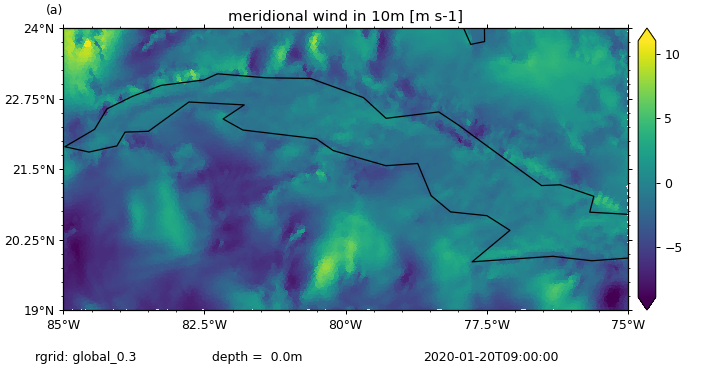

Output()

/home/mpim/m300602/pyicon/pyicon/view/pyicon_view.py:489: UserWarning: Warning: converting a masked element to nan.
  b1.t1.value = climstr


In [19]:
lon_reg = [-85,-75]
lat_reg = [19,24]
PyicV = pyic.view.hplot(IcD, grid_type='tgrid', logplot=False, verbose=False, lon_reg=lon_reg, lat_reg=lat_reg)